<a href="https://colab.research.google.com/github/ojhall94/TASC5_lightkurve/blob/master/Notebooks/Colab-K2-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Characterising EPIC 201367296 with lightkurve

The star  EPIC 201367296 is a main sequence star observed in Campaign 1 of the K2 mission, and one of the stars analysed in the [Chaplin et al. 2015](https://arxiv.org/abs/1507.01827) first analysis of K2 main sequence targets.

Unlike many *Kepler* main sequence stars that have been studied with asteroseismology, we only have one K2 campaign (3 months) worth of data for this star. This makes our analysis a little more difficult, as we'll have a poorer time resolution.

This notebook won't have as much commentary. Check out the example notebook on KIC 10963064 (aka Rudy) for a more in-depth introduction to the tools.

You can learn more and find tutorials at https://docs.lightkurve.org/ !

This notebook, along with others that deal with asteroseismic analysis of Kepler and TESS targets, can be found on [this GitHub repository](https://github.com/ojhall94/TASC5_lightkurve).

In [1]:
!pip install lightkurve
import matplotlib
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings('ignore')
import lightkurve as lk

In [3]:
target = 'EPIC 201367296'

datalist = lk.search_lightcurvefile(target, cadence='short')
datalist

SearchResult containing 1 data products.

 target_name       productFilename                   description              distance
------------- -------------------------- ------------------------------------ --------
ktwo201367296 ktwo201367296-c01_slc.fits Lightcurve Short Cadence (KSC) - C01      0.0

In [0]:
lc = datalist.download().PDCSAP_FLUX.normalize().remove_nans().flatten().remove_outliers()

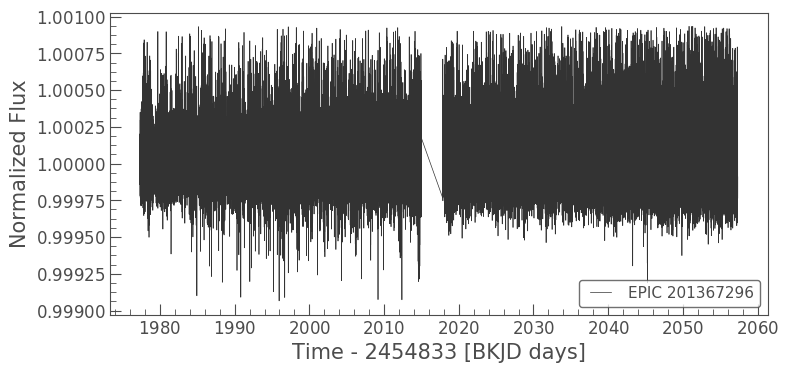

In [5]:
%matplotlib inline
lc.plot()

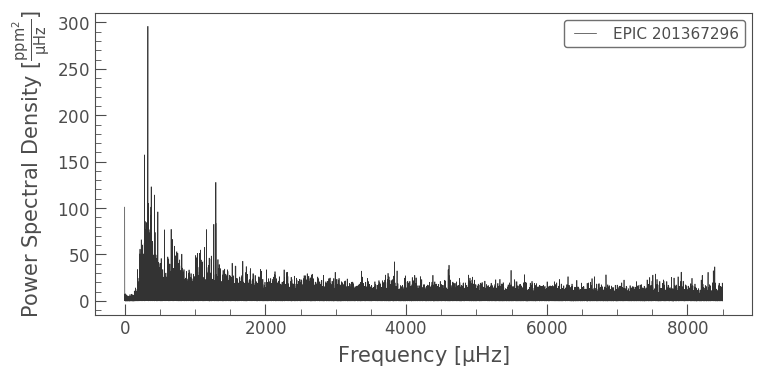

In [6]:
%matplotlib inline
pg = lc.to_periodogram(normalization='psd')
pg.plot()

Let's zoom in on the relevant region.

In [0]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=800, maximum_frequency=2000)

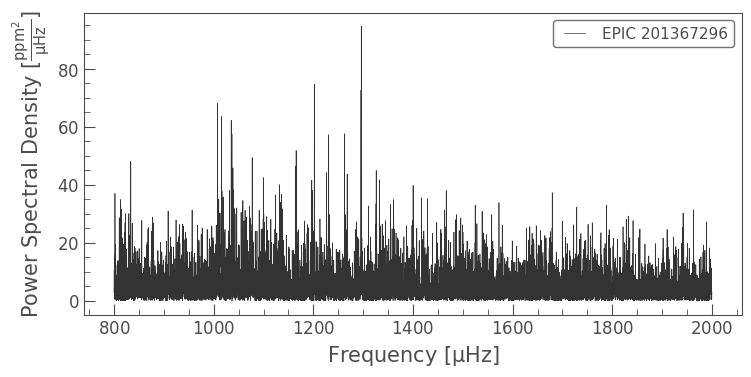

In [8]:
%matplotlib inline
pg.plot()

Just flattening the periodogram before going into seismology tools...

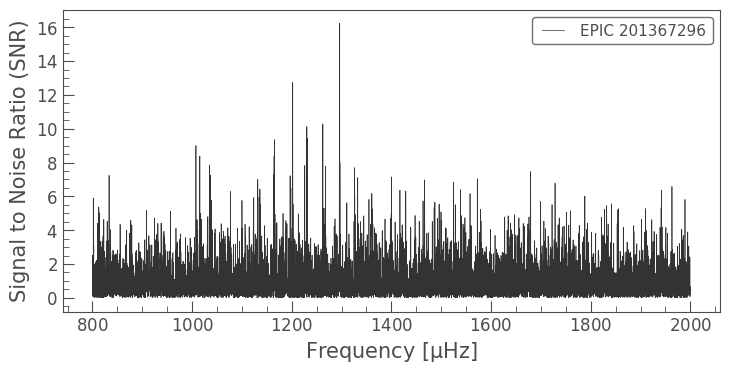

In [9]:
%matplotlib inline
snr = pg.flatten()
snr.plot()

Lets throw our seismology tools at this noiser spectrum and see how they do!

In [0]:
seis = snr.to_seismology()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f77fb325eb8>,
      dtype=object)

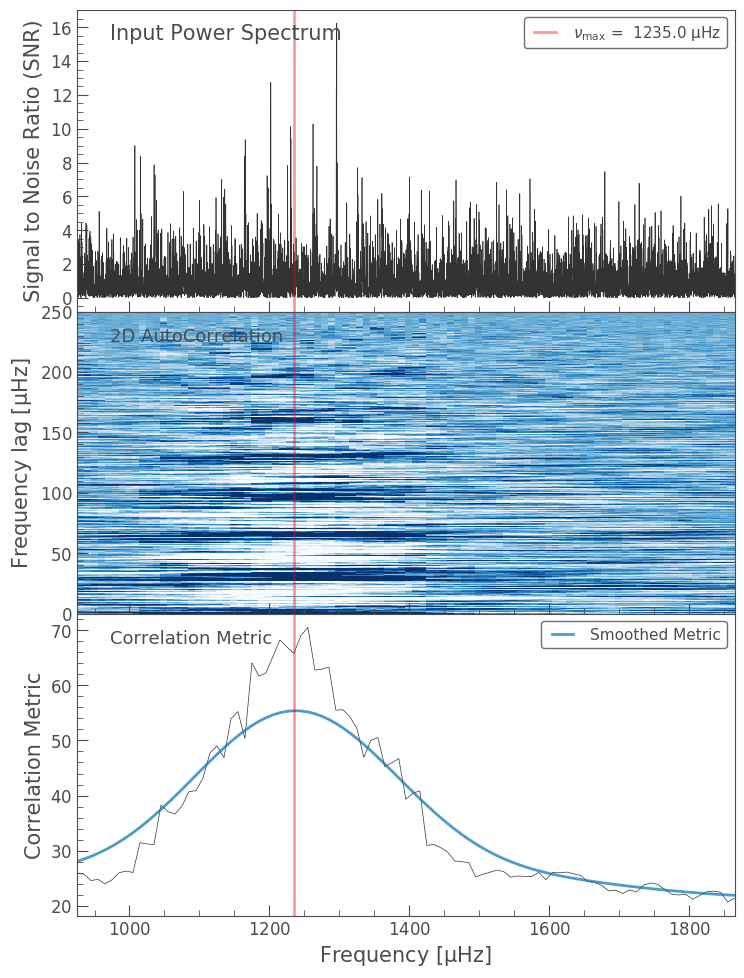

In [11]:
%matplotlib inline
seis.estimate_numax()
seis.diagnose_numax()

Okay, so globally this looks alright, but the resolution is pretty poor. Let's try and improve this by changing the central frequencies (`numaxs`) at which the autocorrelation is evaluated. We'll decrease the spacing, so that the resolution increases.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f77fa7f3780>,
      dtype=object)

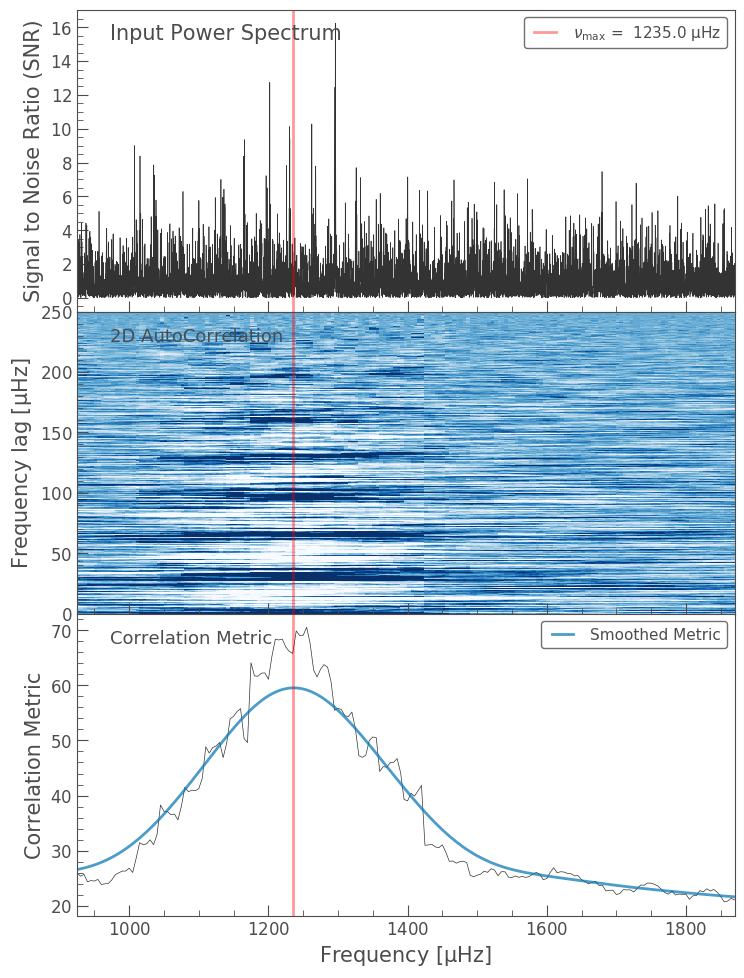

In [12]:
%matplotlib inline
seis.estimate_numax(spacing=5)
seis.diagnose_numax()

Now let's see what the $\Delta\nu$ estimation looks like.

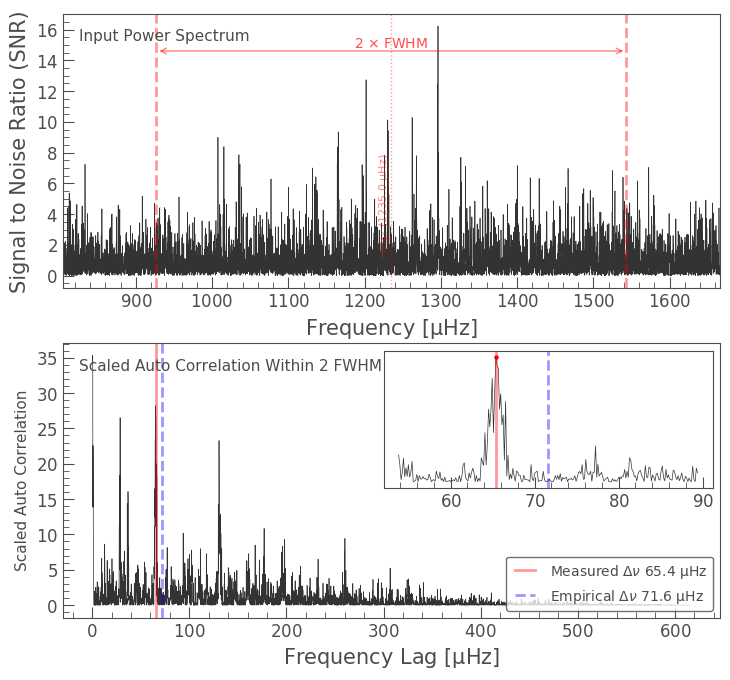

In [13]:
%matplotlib inline
seis.estimate_deltanu()
seis.diagnose_deltanu()

Yikes, that ACF looks super noisy, but we're getting strong repeating peaks at least, and only one close to the empirical estimate for $\Delta\nu$. Thats good enough for me! Let's calculate some stellar parameters, and see how they fare against those in Chaplin et al. 2015.

In [0]:
teff = 5695
mass = seis.estimate_mass(teff)

In [0]:
radius = seis.estimate_radius(teff)

In [0]:
logg = seis.estimate_logg(teff)

In [17]:
print('True numax: {} +- {} vs {:.2f} microHz'.format(1176, 58., seis.numax.value))
print('True deltanu: {} +- {} vs {:.2f} microHz'.format(65.7, 0.7, seis.deltanu.value))
print('True Radius: {} +- {} vs {:.2f} Rsol'.format(1.71, 0.03, radius.value))
print('True Mass: {} +- {} vs {:.2f} Msol'.format(1.14, 0.05, mass.value))
print('True Logg: {} +- {} vs {:.2f} dex'.format(4.032, 0.008, logg.value))

True numax: 1176 +- 58.0 vs 1235.00 microHz
True deltanu: 65.7 +- 0.7 vs 65.39 microHz
True Radius: 1.71 +- 0.03 vs 1.69 Rsol
True Mass: 1.14 +- 0.05 vs 1.14 Msol
True Logg: 4.032 +- 0.008 vs 4.04 dex


Looks like they're all in the right ballpark, neat! Especially the lock on $\Delta\nu$ is good, given the signal-to-noise. The exactly location of $\nu_{\rm max}$ is harder to get right given the noise, but we've recovered it well enough to get a good grasp on the remaining stellar parameters, which is reassuring.

Let's plot a quick echelle diagram for good measure.

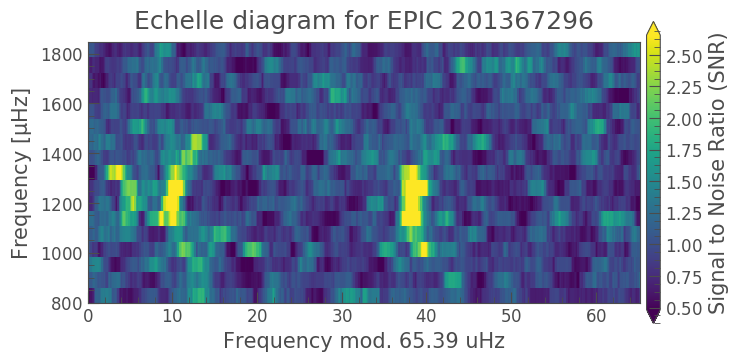

In [18]:
%matplotlib inline
seis.plot_echelle(smooth_filter_width=2., cmap='viridis')

There's some divergence in the l=0,2 pair, but overall, looks decent!

In [19]:
seis

Seismology(ID: 201367296) - computed values:
 * numax: 1235.00 uHz (method: ACF2D)
 * deltanu: 65.39 uHz (method: ACF2D)
 * mass: 1.14 solMass (method: Uncorrected Scaling Relations)
 * radius: 1.69 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.04 dex (method: Uncorrected Scaling Relations)